In [10]:
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, MaxPool1D
from keras.utils import np_utils

In [11]:
import pickle
def load_pickle(file_name):
    with open(file_name, 'rb') as f:
        obj = pickle.load(f)
    return obj

In [12]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Test"], loc=0)

def plot_acc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title("Model Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Test"], loc=0)

In [13]:
x_train = load_pickle('x_train_sequences.pickle')
labels = load_pickle('y_train_sequences.pickle')
y_train = np_utils.to_categorical(labels)

In [14]:
from sklearn.model_selection import train_test_split

X_trainval, X_test, y_trainval, y_test = train_test_split(x_train, y_train, test_size=0.15, random_state=1234)

len(X_trainval), len(X_test), len(y_trainval), len(y_test)

(140938, 24872, 140938, 24872)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.4, random_state=1234)

len(X_train), len(X_val), len(y_train), len(y_val)

(84562, 56376, 84562, 56376)

In [16]:
max_features = 50863
MAX_SEQUENCES_LENGTH = 95

In [17]:
model1 = load_model('model1.hdf5')
model2 = load_model('model2.hdf5')

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


- model1: relu
- model2: tanh

In [18]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist1 = model1.fit(X_train, y_train, epochs=10, batch_size=200, validation_data=(X_val, y_val))

Train on 84562 samples, validate on 56376 samples
Epoch 1/10
84562/84562 [==============================] - 30s 359us/step - loss: 1.0744 - acc: 0.6575 - val_loss: 0.5979 - val_acc: 0.8261
Epoch 2/10
84562/84562 [==============================] - 29s 342us/step - loss: 0.4088 - acc: 0.8959 - val_loss: 0.3166 - val_acc: 0.9294
Epoch 3/10
84562/84562 [==============================] - 29s 342us/step - loss: 0.2613 - acc: 0.9455 - val_loss: 0.2770 - val_acc: 0.9349
Epoch 4/10
84562/84562 [==============================] - 29s 342us/step - loss: 0.2132 - acc: 0.9570 - val_loss: 0.2556 - val_acc: 0.9396
Epoch 5/10
84562/84562 [==============================] - 29s 342us/step - loss: 0.1914 - acc: 0.9631 - val_loss: 0.2523 - val_acc: 0.9388
Epoch 6/10
84562/84562 [==============================] - 29s 343us/step - loss: 0.1720 - acc: 0.9678 - val_loss: 0.2572 - val_acc: 0.9368
Epoch 7/10
84562/84562 [==============================] - 29s 342us/step - loss: 0.1625 - acc: 0.9704 - val_loss: 0.

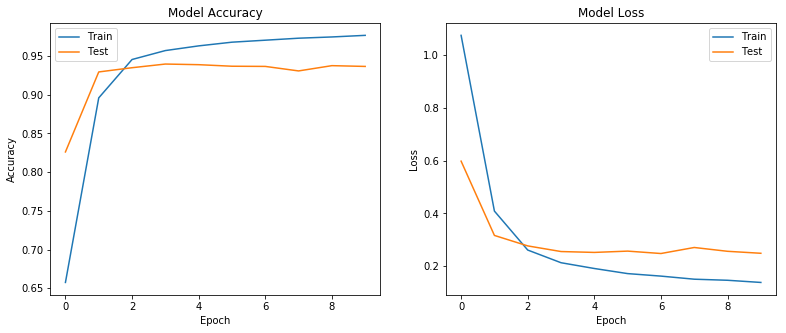

In [19]:
plt.figure(figsize=(13,5))
plt.subplot(121)
plot_acc(hist1)
plt.subplot(122)
plot_loss(hist1)

In [20]:
model1.save('model1_relu_trained.hdf5')